In [1]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
def val(P,x):
    return P[0]+P[1]*x+P[2]*x*x
def grad(P,x):
    return P[1]+P[2]*2*x

N=200,A=0
mean=1799.0598184160353,median=1788.9153350743213
opt=1776.9456270239568 (arg=4.515023721870306)


<IPython.core.display.Javascript object>


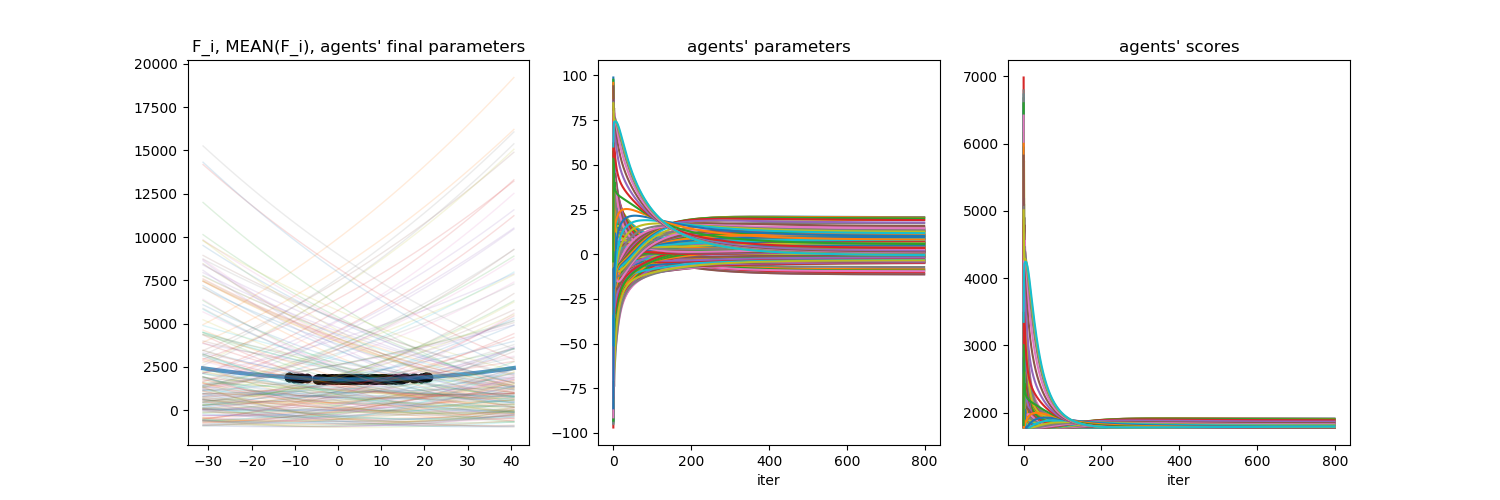

[-8.337463448806833, -8.461833594952331, -9.146697031588976, -10.309423217768904, -11.2574686313391, -11.244650287570556, -9.48821357283491, -7.175738858823695, -4.593671151396126, -2.480665924366855, -0.19728875237133683, 2.4371756341263446, 5.351011370830709, 8.251501768347918, 10.988026983960753, 13.082678258925517, 14.541313539426712, 14.948646209418394, 14.817434093675788, 14.199871066131486, 13.464090860764585, 12.881151668242003, 12.340654824390256, 11.891135577245697, 11.263972415411091, 10.870333876062581, 10.222516591211019, 8.993054644767604, 6.560061067169021, 3.5847974090348385, 1.3668864830360654, -0.29856100269905833, -1.6836677852536883, -3.383802140929235, -4.445903974463738, -4.710011048831461, -4.6982034770519325, -4.314520015833303, -3.7114718835102827, -3.2309468409765887, -3.4689948697485704, -4.312199242749744, -4.919010783343882, -4.942529158430432, -4.47548215934158, -3.9855061864596824, -3.630912382925265, -3.3476109220423296, -3.0995753067246667, -2.942349405

In [10]:
N,A=200,0
ITER=800
print('N='+str(N)+',A='+str(A))
T=0.005
rnd.seed(1)
#Ps=[[0,0,1],[1000000,-2000,1],[1000000,-2000,1],[0,0,1]]
Ps=[]
for i in range(N):
    a=rnd.uniform(0,1)
    v=rnd.uniform(-100,100)
    #a(x-v)^2=ax^2-2avx+av^2
    Ps.append([a*v*v+rnd.uniform(-1000,1000),-2*a*v,a])
breadth=1
graph=[[j for j in range(max(0,i-breadth),min(i+breadth+1,N))] for i in range(N)]
for a in range(A):
    graph.append([i for i in range(N)])
    for i in range(N):
        graph[i].append(len(graph)-1)
locsversions=[]
locs=[rnd.uniform(-100,100) for i in range(N)]
for a in range(A):
    locs.append(10000)
for rep in range(ITER):
    locsversions.append(locs.copy())
    nlocs=[locs[i]-T*grad(Ps[i],locs[i]) for i in range(N)]
    for a in range(A):
        nlocs.append(10000) #basic adversary: always send this big number to all neighbors
    for i in range(N):
        #TODO: use smarter use of neighbors' values?
        tmp=[nlocs[j] for j in graph[i]]
        tmp.sort()
        locs[i]=np.mean(tmp)#[1:-1])
locsversions.append(locs)
tP=[0 for i in range(3)]
for P in Ps:
    for i in range(3):
        tP[i]+=P[i]
for i in range(3):
    tP[i]/=N
scrs=[val(tP,locs[i]) for i in range(N)]
print('mean='+str(np.mean(scrs))+',median='+str(np.median(scrs)))
print('opt='+str(val(tP,-tP[1]/(2*tP[2])))+' (arg='+str(-tP[1]/(2*tP[2]))+')')

t1=np.linspace(min(locs[0:N])-20,max(locs[0:N])+20,50)
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))
ax1.set_title('F_i, MEAN(F_i), agents\' final parameters')
ax1.plot(t1,val(tP,t1),linewidth=3,alpha=0.75)
for P in Ps:
    ax1.plot(t1,val(P,t1),linewidth=1,alpha=0.15)
ax1.scatter(x=locs[0:N],y=[val(tP,locs[i]) for i in range(N)],c='black')
ax2.set_title('agents\' parameters')
ax2.set_xlabel('iter')
for i in range(N):
    ax2.plot([locsversions[k][i] for k in range(ITER)])
ax3.set_title('agents\' scores')
ax3.set_xlabel('iter')
for i in range(N):
    ax3.plot([val(tP,locsversions[k][i]) for k in range(ITER)])
plt.savefig('tmp.png')
print(locs)